In [103]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
citi_data_df = pd.read_csv(city_data_to_load)
citi_data_df.head()
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head()
# Combine the data into a single dataset
combined_data = pd.merge(ride_data_df, citi_data_df, on="city")
# Display the data table for preview
combined_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

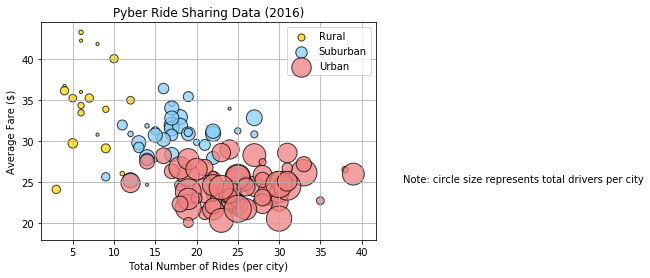

In [104]:
# Obtain the x and y coordinates for each of the three city types
combined_data_rural = combined_data.loc[combined_data["type"] == "Rural"]
combined_data_rural_grouped_count_rides = combined_data_rural.groupby(['city']).count()

combined_data_rural_grouped_average_fare = combined_data_rural.groupby(['city']).mean()

citi_data_df_rural_drivers =  citi_data_df.loc[citi_data_df["type"] == "Rural"].set_index("city").sort_values(["city"])



combined_data_Suburban = combined_data.loc[combined_data["type"] == "Suburban"]
combined_data_Suburban_grouped_count_rides = combined_data_Suburban.groupby(['city']).count()

combined_data_Suburban_grouped_average_fare = combined_data_Suburban.groupby(['city']).mean()

citi_data_df_Suburban_drivers =  citi_data_df.loc[citi_data_df["type"] == "Suburban"].set_index("city").sort_values(["city"])



combined_data_Urban = combined_data.loc[combined_data["type"] == "Urban"]
combined_data_Urban_grouped_count_rides = combined_data_Urban.groupby(['city']).count()

combined_data_Urban_grouped_average_fare = combined_data_Urban.groupby(['city']).mean()

citi_data_df_Urban_drivers =  citi_data_df.loc[citi_data_df["type"] == "Urban"].set_index("city").sort_values(["city"])

# Build the scatter plots for each city types
plt.scatter(combined_data_rural_grouped_count_rides["ride_id"],
            combined_data_rural_grouped_average_fare["fare"] ,
            marker="o",
            facecolors="Gold",
            edgecolors="black",
            s=citi_data_df_rural_drivers["driver_count"]*10,
            alpha=0.75,
            label="Rural")

# Build the scatter plots for each city types
plt.scatter(combined_data_Suburban_grouped_count_rides["ride_id"],
            combined_data_Suburban_grouped_average_fare["fare"] ,
            marker="o",
            facecolors="lightskyblue",
            edgecolors="black",
            s=citi_data_df_Suburban_drivers["driver_count"]*10,
            alpha=0.75,
            label="Suburban")

# Build the scatter plots for each city types
plt.scatter(combined_data_Urban_grouped_count_rides["ride_id"],
            combined_data_Urban_grouped_average_fare["fare"] ,
            marker="o",
            facecolors="lightcoral",
            edgecolors="black",
            s=citi_data_df_Urban_drivers["driver_count"]*10,
            alpha=0.75,
            label="Urban")
# Incorporate the other graph properties
plt.grid()
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (per city)") 
plt.ylabel("Average Fare ($)")

# Create a legend
plt.legend(loc="upper right")
# Incorporate a text label regarding circle size
plt.text(45 , 25 , 'Note: circle size represents total drivers per city')
# Save Figure
plt.savefig("Buble_plot.png")

In [105]:
# Show plot
plt.show()

## Total Fares by City Type

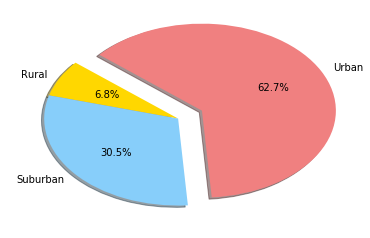

In [106]:
# Calculate Type Percents
combined_data_type_grouped = combined_data.groupby(['type']).sum()
combined_data_type_grouped
# Build Pie Chart

# Labels for the sections of our pie chart
labels = ["Rural","Suburban","Urban"]

# The values of each section of the pie chart
sizes = combined_data_type_grouped["fare"]

# The colors of each section of the pie chart
colors = ["Gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.2)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Save Figure
plt.savefig("Fares_by_City_Type.png")

In [107]:
# Show Figure
plt.show()

## Total Rides by City Type

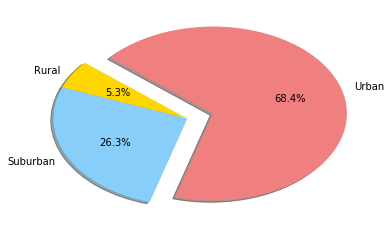

In [108]:
# Calculate Ride Percents
combined_data_type_grouped = combined_data.groupby(['type']).count()
combined_data_type_grouped
# Labels for the sections of our pie chart
labels1 = ["Rural","Suburban","Urban"]

# The values of each section of the pie chart
sizes1 = combined_data_type_grouped["fare"]

# The colors of each section of the pie chart
colors1 = ["Gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode1 = (0, 0, 0.2)


# Build Pie Chart
plt.pie(sizes1, explode=explode1, labels=labels1, colors=colors1,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Save Figure
plt.savefig("Rides_by_City_Type.png")

In [109]:
# Show Figure
plt.show()

## Total Drivers by City Type

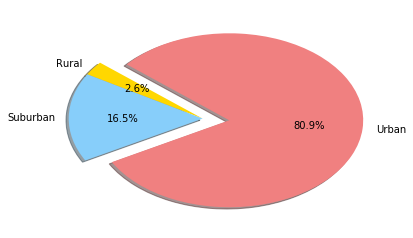

In [110]:
# Calculate Driver Percents
citi_data_df_grouped = citi_data_df.groupby(['type']).sum()

# Build Pie Chart
plt.pie(citi_data_df_grouped["driver_count"],
        explode=(0, 0, 0.2),
        labels=["Rural","Suburban","Urban"], 
        colors=["Gold","lightskyblue", "lightcoral"],
        autopct="%1.1f%%", shadow=True, startangle=140)

# Save Figure
plt.savefig("Drivers_by_City_Type.png")

In [111]:
# Show Figure
plt.show()